<a href="https://colab.research.google.com/github/Onyimatics/time_seres_heart_rate_prediction/blob/master/Time_Series_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: **Onyinye Ezike**
Student ID: **24156343**
Module: **CMP7229 Applied AI**
Program: **MSc Artificial Intelligence With Professional Placement**
Lecturer: **Dr Muhammad Afzal**
School: **Birmingham City University**
Date: **February 2025**

[Link To Best Model](https://colab.research.google.com/drive/1mCwVqM71Tlds8YWFZ-xm6BDNM5uru-jb?usp=sharing)

[Link To All The Experiment](https://colab.research.google.com/drive/1P3CwCjSTvm-5NJI_hLIu3nqzHnHulAGW?usp=sharing)

#**Heart Rate Prediction Using SARIMAX**

Sudden heart rate changes can cause severe conditions like stroke, heart failure, or even death, making continuous monitoring essential. This blog explores how time series modeling can predict heart rate patterns, shifting healthcare from reactive treatment to proactive prevention.

**DATA PREPROCESSING**

The experiment began with data visualization, revealing extreme outliers in heart rate and respiration rate, likely due to sensor errors. [IQR](https://en.wikipedia.org/wiki/Interquartile_range) method detected these outliers, which were then handled using linear interpolation without dropping rows to maintain the time series index. Additionally, null and negative values in the oximeter SpO2 and oximeter columns were corrected using linear interpolation and forward filling. Below is a plot showing the data before and after cleaning.

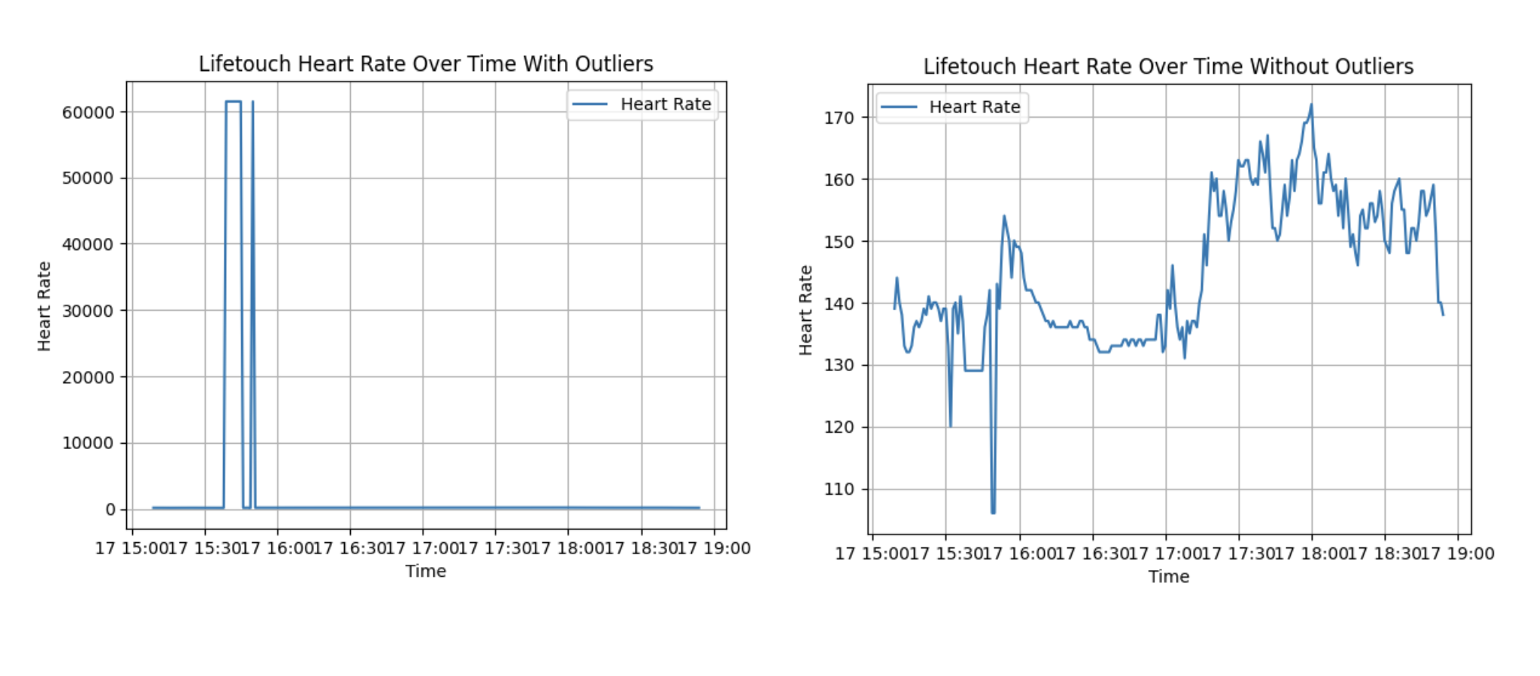

Seasonal decomposition revealed a fluctuating heart rate with an upward trend and clear seasonal patterns, indicating periodic variations. Residuals showed some noise, while autocorrelation and partial autocorrelation plots confirmed a strong dependency on past values. A stationarity check using the [KPSS](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html) test confirmed the series was not stationary, guiding the selection of appropriate time series models for prediction.

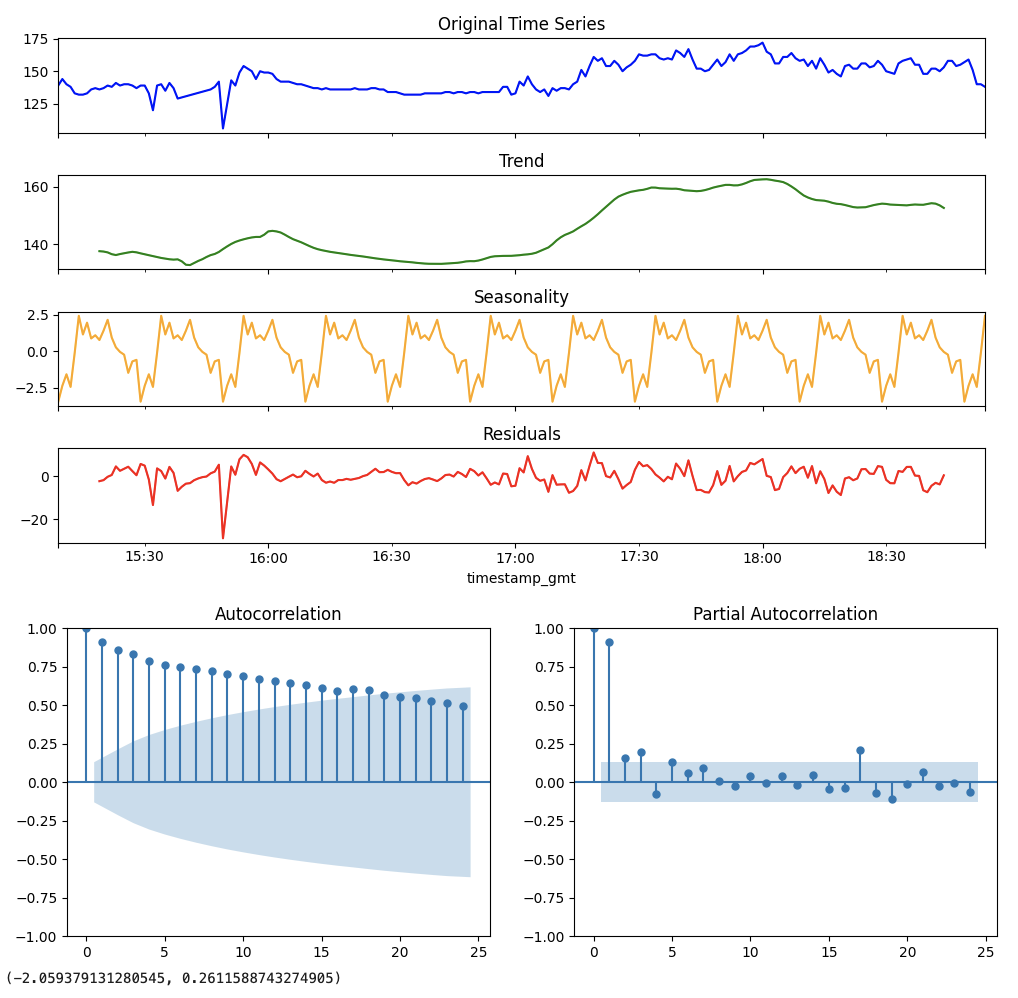

**MODEL SELECTION**

ARIMA was not suitable for the experiment because the data showed seasonal patterns and external factors. Instead, SARIMA, SARIMAX, and Holt-Winters Exponential Smoothing were chosen. Moving Average was ruled out as it is best for stationary data without trend or seasonality, and LMA was also unsuitable for this dataset.

**SARIMA**

Parameter optimisation was done to find the best model configuration based on  [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). This systematically found the optimal order and seasonal_order parameters for SARIMA model. Low AIC of 230.49 was gotten which gave MSE of 12.11.

In [ ]:
model = sm.tsa.statespace.SARIMAX(heart_rate_df['heart_rate'],
                                order=(1, 1, 3),
                                seasonal_order=(1, 0, 3, 60),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
# train model
sarima_fit = model.fit()


In [ ]:
ARIMA(1, 1, 3)x(1, 0, 3, 60)12 - AIC:230.49265839183204

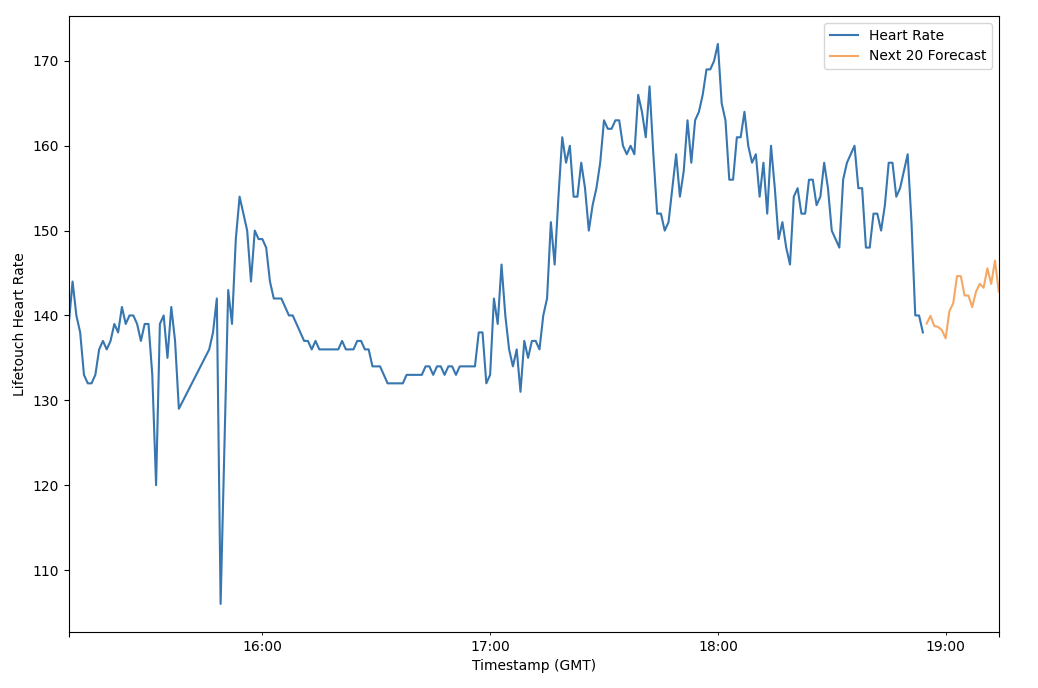

**SARIMAX**

SARIMAX is similar to SARIMA but includes exogenous variables. The correlation between the heart rate feature and other features was checked in order to determine the exogenous variable, and Respiration rate was highly correlated. Hence, it was used as the exog variable. 230.49 was chosen as AIC which gave MSE of 11.35

In [ ]:
sarimax_model = sm.tsa.statespace.SARIMAX(heart_rate_df['heart_rate'],
                                  order=(1, 1, 3),
                                  seasonal_order=(1, 0, 3, 60),
                                  exog=heart_rate_df[['respiration_rate']],  # Exogenous variable
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train the sarima model
sarimax_results = sarimax_model.fit()
# Print model summary
print(sarimax_results.summary())

In [ ]:
ARIMA(1, 1, 3)x(1, 0, 3, 60)12 - AIC:230.49265839183204

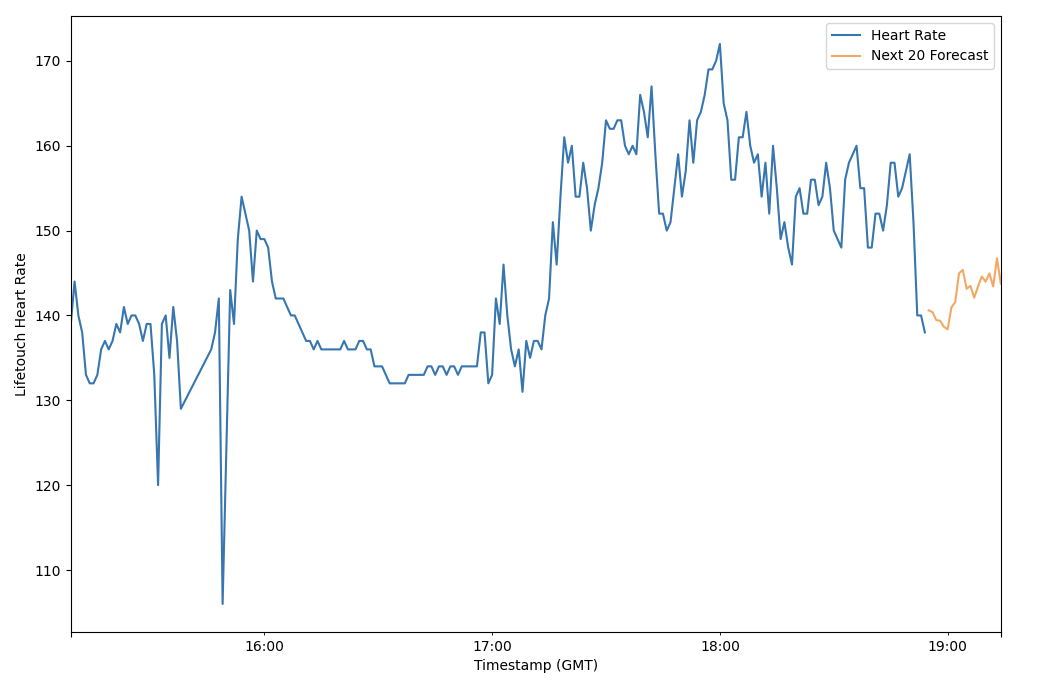

**EXPONENTIAL SMOOTHING (HOLT-WINTERS)**

Because the data has trends and season, HOLT-WINTERS Exponential Smoothing was used which gave MSE of 16.08

In [ ]:
holt_winters = ExponentialSmoothing(heart_rate_df['heart_rate'], trend="mul",seasonal="mul", seasonal_periods=12).fit()

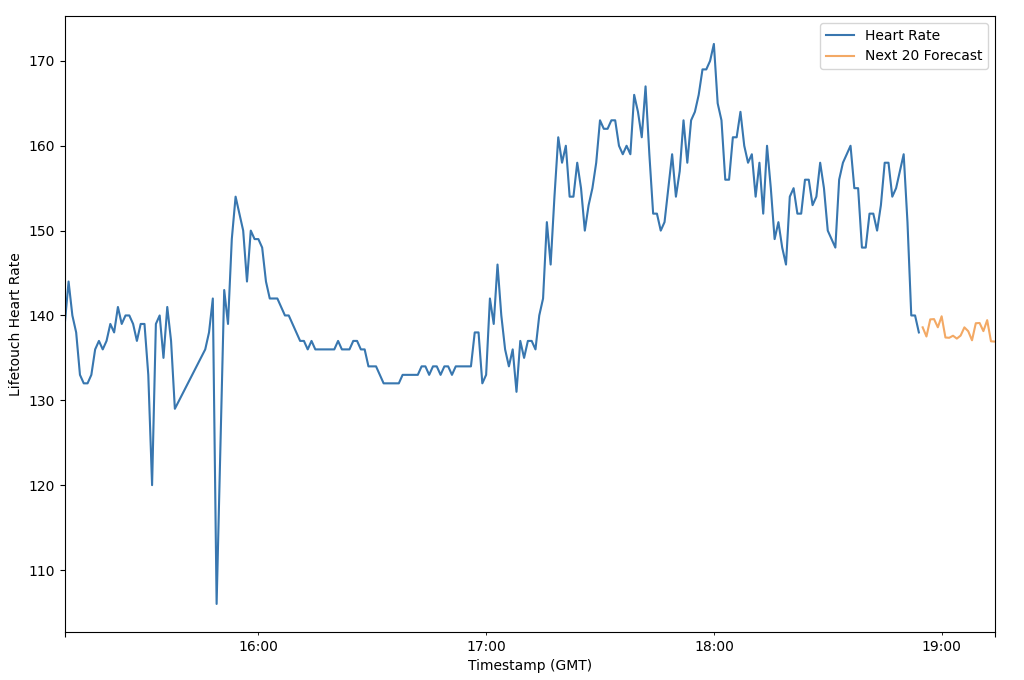

**RESULT SUMMARY**

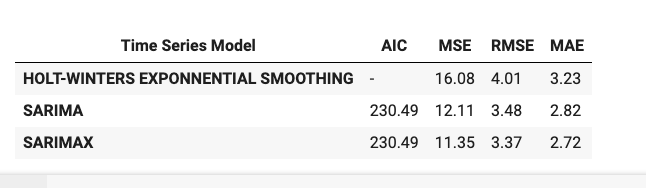

From the result, **SARIMAX** model outperformed others because it effectively captured both trend and seasonality while incorporating exogenous variables.